<a href="https://colab.research.google.com/github/franconoronha/treinamento-h2ia/blob/main/10_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Máquina Supervisionado
## Multilayer Perceptron

Tá funcionando, só que tá bem lento, estou fazendo outra versão melhor 👍

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [ ]:
digits = load_digits()

inputs = digits.data
targets = digits.target

In [ ]:
def ReLU(array):
  return np.maximum(0, array)

def deriv_ReLU(array):
  return array > 0

def softmax(array):
  return np.exp(array) / np.exp(array).sum()

def one_hot(val):
  return np.eye(10)[val].reshape((10,1))

def cross_entropy(prediction, target):
  return -np.sum(np.log(prediction) * target)

In [ ]:
class Rede:
  def __init__(self, size, learning_rate):
    self.layers = []
    self.LEARNING_RATE = learning_rate
    self.biases = []
    num_layers = len(size)
    last_layer_width = 64 # inputs na primeira camada
    for i, x in enumerate(size):
      ''' self.weights = np.random.normal(loc=0.0, 
                                          scale = np.sqrt(2/(input_units+output_units)), 
                                          size = (input_units,output_units)) '''
      #self.layers.append(np.random.normal(0.0, size=(last_layer_width, x)))
      self.layers.append(np.array([np.random.uniform(-1, 1, last_layer_width) for x in range(0, x)]))
      #self.biases.append(np.random.uniform(-1, 1, x))
      self.biases.append(np.zeros(x))
      last_layer_width = x 

  def feedforward(self, input, store=True):
    input = input.reshape((len(input),1))
    A = []
    for i, layer in enumerate(self.layers):
      output_layer = i == len(self.layers) - 1

      values = np.dot(layer, input) + self.biases[i].reshape((len(layer),1))
      if output_layer:
        outputs = softmax(values)
      else:
        outputs = ReLU(values)
      A.append(outputs)
      input = outputs

    if store:
      return outputs, A
    else:
      return outputs

  def backpropagation(self, prediction, A, target, input):
    dZM = prediction - target
    gradients = []
    for i, layer in enumerate(self.layers[::-1]):
      if i == 0: # pesos na camada de output
        for j, line in enumerate(layer.T):
          gradient = dZM * A[-2][j]
          gradients.append(gradient)
          line += -self.LEARNING_RATE * gradient.reshape(len(line))
          #self.biases[i][j] -= self.LEARNING_RATE * gradient.sum()
      else: 
        for ii in range(0,10):
          linha = (gradients[ii] * self.layers[-1].T[ii]).sum() * deriv_ReLU(A[0][ii])
          #self.biases[0][ii] += -self.LEARNING_RATE * linha
          for jj in range(0,64):
            self.layers[0][ii][jj] += -self.LEARNING_RATE * linha * input[jj]

In [ ]:
MLP = Rede([200,10], 0.05) # rede com 2 camadas (não inclui inputs)
#random_state
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.33)
X_train = X_train / 16
X_test = X_test / 16

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1)

In [ ]:
print(f"Testados: {len(X_test)}")
def testar():
  resultados = [MLP.feedforward(x, False).argmax() for x in X_test]
  corretos = 0
  for i, r in enumerate(resultados):
    if r == y_test[i]:
      corretos += 1
  print(f"Corretos: {corretos} / {len(X_test)}")
  print(f"Acurácia: {corretos / len(X_test)}")

def treino(epocas):
  print("-- treinando -- ")
  for e in range(0, epocas):
    for i, val in enumerate(X_train):
      prediction, A = MLP.feedforward(val)
      MLP.backpropagation(prediction, A, one_hot(y_train[i]), val)
    print(f"Epoca {e}")
    testar()

testar()
treino(20)

Testados: 534
Corretos: 22 / 534
Acurácia: 0.04119850187265917
-- treinando -- 
Epoca 0
Corretos: 450 / 534
Acurácia: 0.8426966292134831
Epoca 1
Corretos: 460 / 534
Acurácia: 0.8614232209737828
Epoca 2
Corretos: 453 / 534
Acurácia: 0.848314606741573
Epoca 3
Corretos: 479 / 534
Acurácia: 0.897003745318352
Epoca 4
Corretos: 506 / 534
Acurácia: 0.947565543071161
Epoca 5
Corretos: 495 / 534
Acurácia: 0.9269662921348315
Epoca 6
Corretos: 488 / 534
Acurácia: 0.9138576779026217
Epoca 7
Corretos: 497 / 534
Acurácia: 0.9307116104868914
Epoca 8
Corretos: 512 / 534
Acurácia: 0.9588014981273408
Epoca 9
Corretos: 502 / 534
Acurácia: 0.9400749063670412
Epoca 10
Corretos: 492 / 534
Acurácia: 0.9213483146067416
Epoca 11
Corretos: 510 / 534
Acurácia: 0.9550561797752809
Epoca 12
Corretos: 510 / 534
Acurácia: 0.9550561797752809
Epoca 13
Corretos: 500 / 534
Acurácia: 0.9363295880149812
Epoca 14
Corretos: 513 / 534
Acurácia: 0.9606741573033708
Epoca 15
Corretos: 510 / 534
Acurácia: 0.9550561797752809
Epoca

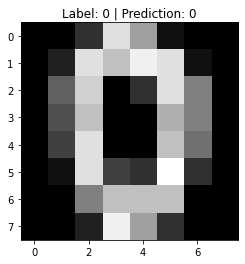

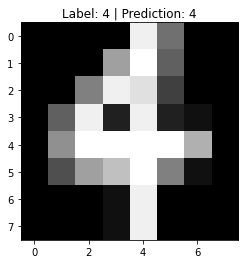

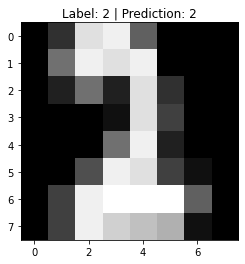

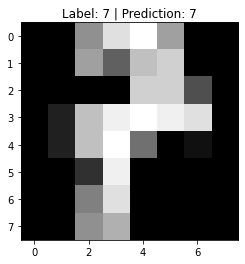

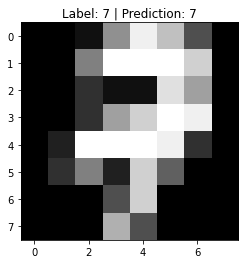

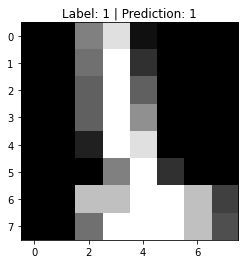

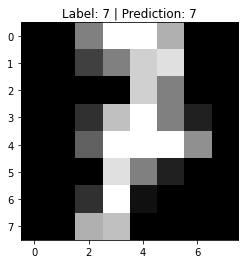

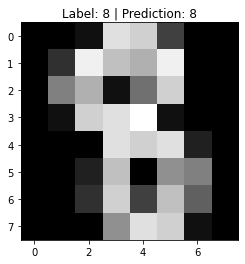

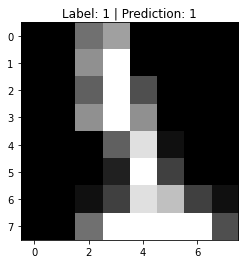

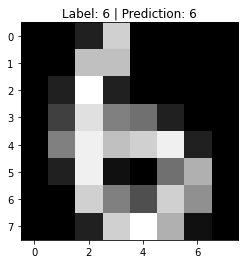

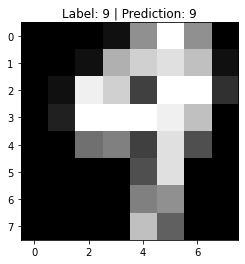

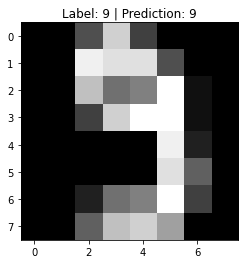

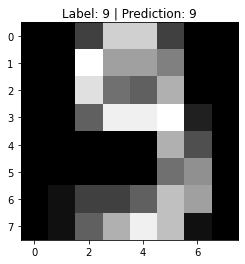

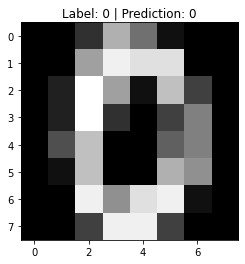

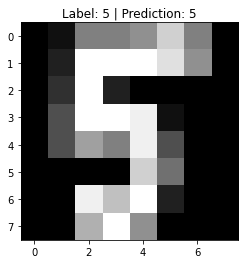

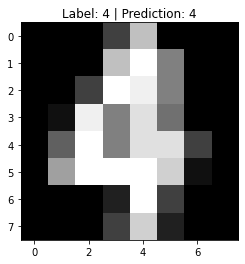

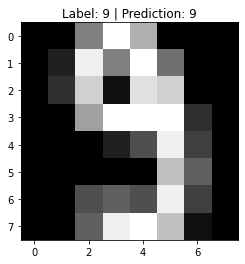

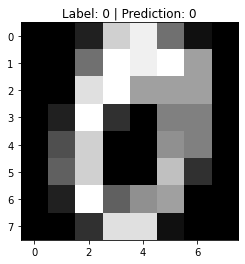

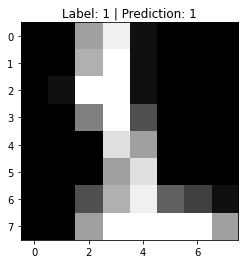

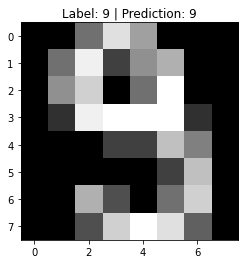

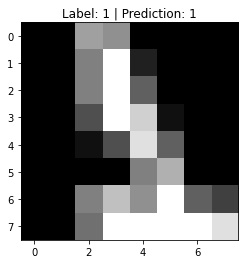

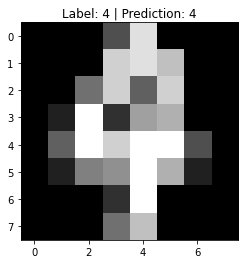

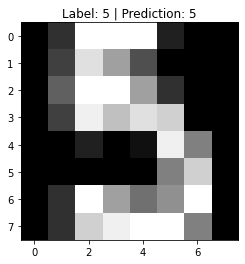

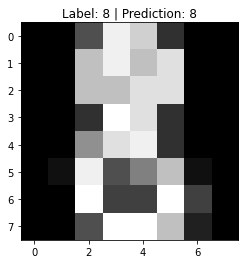

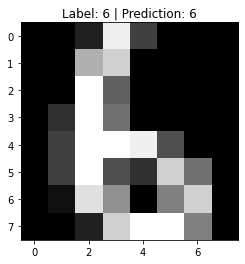

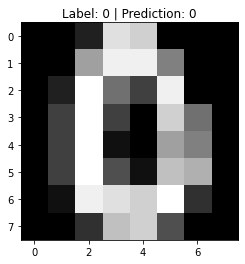

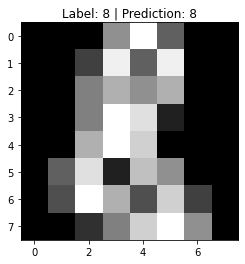

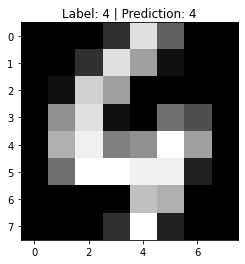

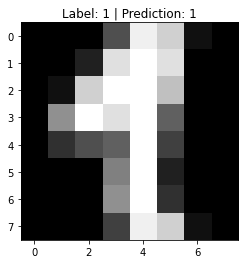

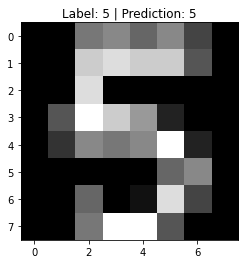

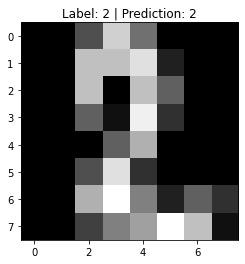

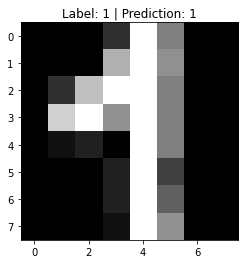

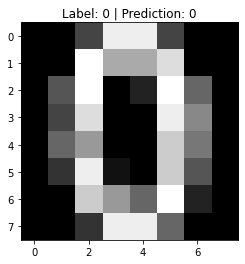

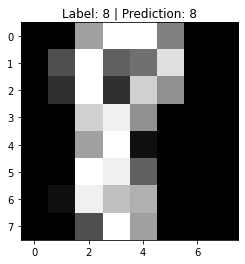

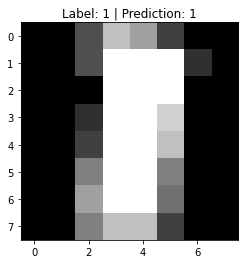

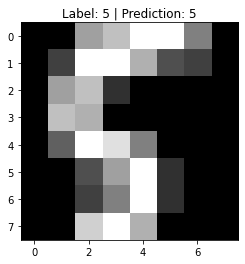

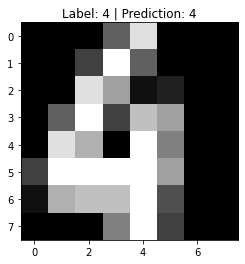

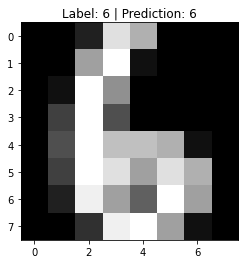

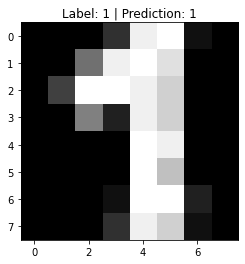

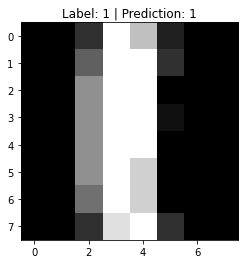

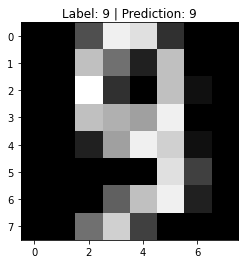

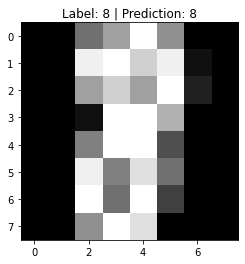

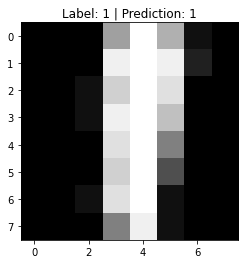

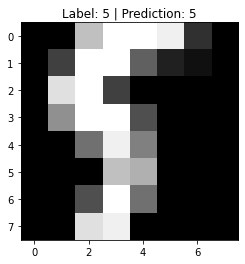

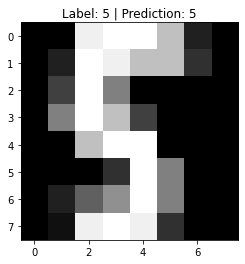

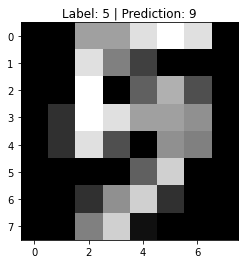

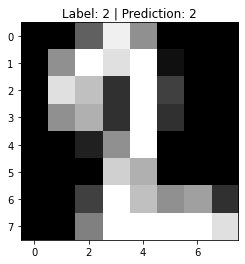

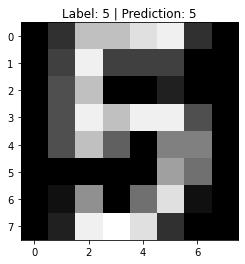

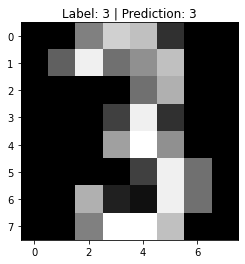

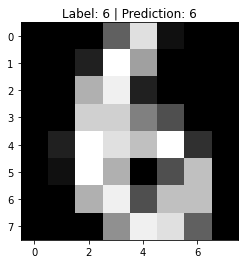

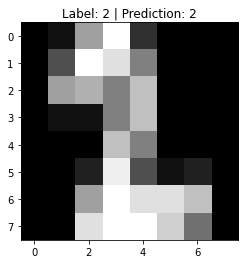

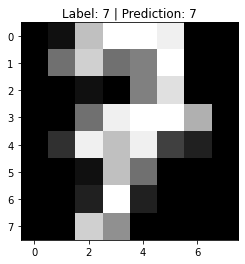

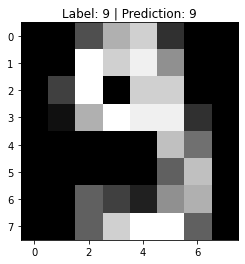

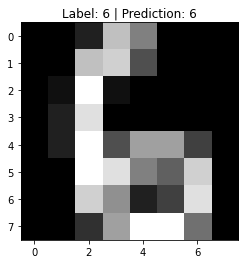

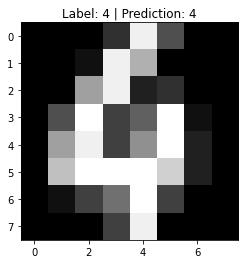

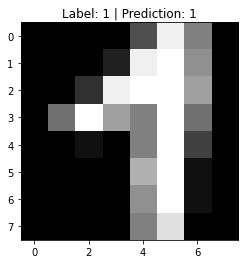

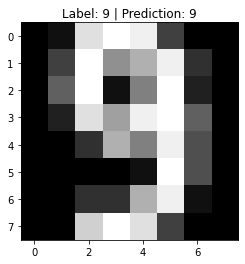

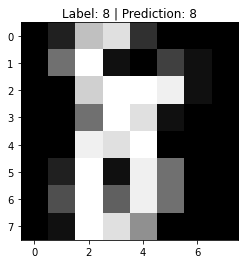

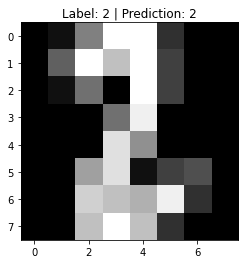

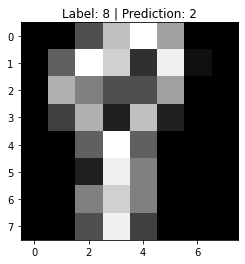

In [ ]:
for i, digit in enumerate(X_val):
  prediction = np.argmax(MLP.feedforward(digit, False))
  plt.title(f"Label: {y_val[i]} | Prediction: {prediction}")
  plt.imshow(digit.reshape((8,8)), cmap="gray")
  plt.show()